# Compte-rendu de TP : JABER Bassem, KEBAILI Abir et ZRIBI Nour El Houda 

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt

Question 1.

In [2]:
data_exp=pd.read_csv('/mci/ei1720/jaber_ba/Téléchargements/EXPRESSION.tsv', sep='\t', index_col=0)
data_pheno=pd.read_csv('/mci/ei1720/jaber_ba/Téléchargements/PHENOTYPE.tsv', sep='\t', index_col=0)
txt=pd.read_csv('/mci/ei1720/jaber_ba/Téléchargements/ANNOTATIONS.txt', sep="\t", header=None)
print(len(data_exp))

43376


Il y a 43 376 transcrits.

In [3]:
dataexpt=data_exp.transpose()
dataphenot=data_pheno.transpose()

Question 2.

In [4]:
mean=dataexpt.mean()

In [5]:
var=dataexpt.var()

Question 3.

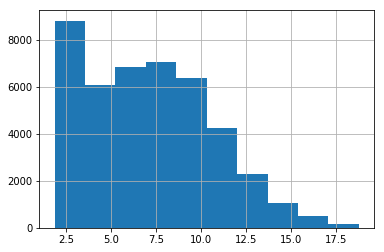

In [6]:
mean.hist()

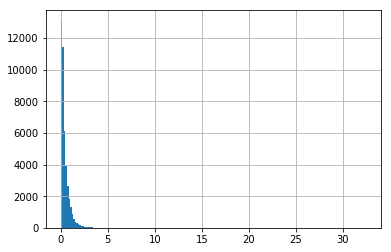

In [7]:
var.hist(bins=200)

In [8]:
data_exp["mean"]=dataexpt.mean()
data_exp["var"]=dataexpt.var()
data_exp1=data_exp.copy()
data_exp1["Nom"]=txt.loc[:,1]

Question 4.

In [9]:
data2=data_exp[data_exp["mean"]>3]
data3=data2[data2["var"]>2]
data4=data_exp1[data_exp1["mean"]>3]
data5=data4[data4["var"]>2]
print(len(data5))

614


Il reste 614 transcrits

Question 5.

L'hypothèse nulle H0 que nous testons est la suivante: "Les moyennes de transcriptions des phénotypes DSS et DF sont les mêmes"

In [10]:
df=data5
DSS=df.loc[:,"GSM447783":"GSM447826"]
DSS1=DSS.copy()
DSS1["Nom"]=df.loc[:,"Nom"]

In [11]:
DF=df.loc[:,"GSM447781":"GSM447827"]
DF1=DF.copy()
DF1["Nom"]=df.loc[:,"Nom"]

Question 6.

In [12]:
from scipy import stats
res=stats.ttest_ind(DSS.transpose(),DF.transpose())

Lorsque l'on effectue un test-t, nos données doivent être des réalisations de variables aléatoires indépendantes identiquement distribuée à la variable aléatoire de leur classe d'appartenance ( X1 variable aléatoire "référence" pour le phénotype DSS et X2 variable aléatoire "référence" pour le phénotype DF par exemple )

Question 7.

In [13]:
valide=[]
for i in range(len(res[1])):
    if res[1][i]<0.05:
        valide.append(i)
print(len(valide))

244


Il y a 244 transcrits ayant une valeur p inférieure à notre seuil d'erreur.
On ne peut considérer l'ensemble de ces résultats comme statistiquement significatifs car nous effectuons un grand nombre de tests et la probabilité qu'au moins l'un d'eux ne soit pas statistiquement significatifs est donc proche de 1.

Question 8.a.

In [14]:
sign=[]
for i in range(len(res[1])):
    if min(res[1][i]*614,1)<0.05:
        sign.append(i)
print(len(sign))

45


Il reste 45 transcrits ayant une valeur p corrigée inférieure à notre seuil d'erreur. On peut considérer que les résultats obtenus sont statistiquement significatifs étant donné que nous avons corrigé les valeurs p par le nombre de tests obtenus ce qui nous donne les même conditions de validité statistique que pour un seul test réalisé seul.

Question 8.b.

In [15]:
from statsmodels.stats.multitest import fdrcorrection

In [16]:
r=fdrcorrection(res[1])

In [17]:
l=[]
noms=[]
for i in range(614):
    if r[0][i]:
        l.append(DSS1.iloc[i])
for k in range(len(l)):
    cur=len(l[k])-1
    noms.append(l[k][cur])
noms=pd.DataFrame(noms)
noms=noms.dropna()
print(len(noms))

163


Si l'on accepte un FDR de 5%, il reste 163 transcrits. On peut considérer qu'il existe dans notre ensemble de test environ 5% de faux positifs et que donc tous les résultats ne sont pas statistiquement significatifs.

Question 9.

In [18]:
print(noms)

                0
0             LTF
1         CASKIN2
2           RBM22
3            SPP1
4          FMR1NB
6            MMP9
7            MMP9
8           PPARG
9           IL1R2
10          OLFM4
13        SLC45A4
14           SPP1
15          PPARG
16        CEACAM6
17         COL1A2
18         FAM20A
19            FGA
21            BMX
22          INHBA
23          HTRA3
24            TEF
25          CABP7
26          PRRX1
27           OLR1
28        C7orf16
29   LOC100129858
30          GPR44
31            MLL
32           IDO1
33        S100A12
..            ...
154          SPP1
156        FAM20A
157          SLPI
158           ID1
159           BMX
160        COL1A2
161         KCNG4
164          SPP1
165          RPA4
166           MPO
167          BEX1
168         EFNB3
169         WFDC1
171        CRISP2
172          ELA2
173          MMP9
174        HMBOX1
175         PPARG
176         CD177
177           ERG
178           BPI
179      FLJ25770
182         PPARG
183       

Question 10.

Si les conditions de validité du t-test n'étaient pas respectées nous aurions pu effectuer un Test de Wilcoxon-Mann-Whitney par exemple.

Question 11.

La prochaine étape de l'analyse consisterait je pense à l'analyse biologique des gènes que nous avons réussi à identifier comme par exemple leurs différentes caractéristiques et leurs effets afin de comprendre les différences entre la DF et la DSS au sens biologique et non mathématique. Nous devons donc laisser la main aux biologistes car le travail statistique est pour le moment terminé.